In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install --upgrade matplotlib


  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)


In [4]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
username = "neo4j"
password = "Pra/pannu1993"

driver = GraphDatabase.driver(uri, auth=(username, password))


In [5]:
query = """
MATCH (n)
RETURN n.contaminated, COUNT(n) AS count
"""

In [6]:
#Run the cypher query and store the results in a pandas dataframe

results = []

with driver.session() as session:
    result = session.run(query)
    for record in result:
        property_value = record["n.contaminated"]
        count = record["count"]
        results.append((property_value, count))

In [7]:
results

[('0', 283958), ('1', 952), (None, 2000)]

In [8]:
results_df = pd.DataFrame(results)

In [9]:
type(results_df)

pandas.core.frame.DataFrame

In [10]:
results_df

0       1
0     0  283958
1     1     952
2  None    2000

In [11]:
results_df = results_df.drop(2)

In [12]:
results_df

0       1
0  0  283958
1  1     952

In [13]:
type(results_df)

pandas.core.frame.DataFrame

In [14]:
results_df.rename(columns = {0:'Category'}, inplace = True)
results_df.rename(columns = {1:'Count'}, inplace = True) 

In [15]:
results_df

Category   Count
0        0  283958
1        1     952

In [16]:
# Renaming column values
rename_dict = {
    0: 'Non-contaminated',
    1: 'Contaminated',
}

In [17]:
# Replace the values in the 'old_column' using the rename_dict
results_df['Category'] = results_df['Category'].replace(rename_dict)

In [18]:
results_df

Category   Count
0        0  283958
1        1     952

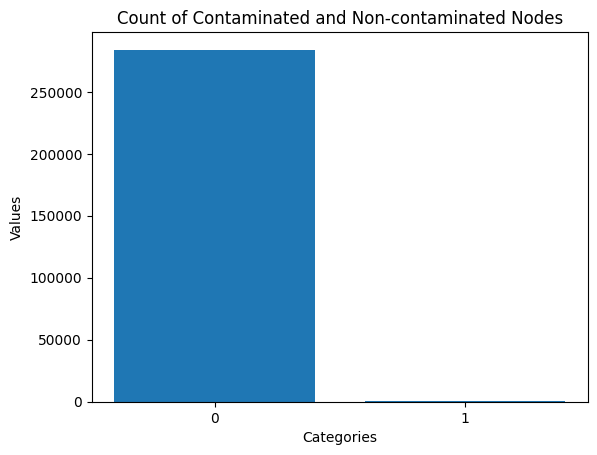

In [19]:
# Create a bar plot
plt.bar(results_df['Category'], results_df['Count'])
plt.rcParams["figure.figsize"] = (10,5)



# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Count of Contaminated and Non-contaminated Nodes')

# Display the plot
plt.show()


In [20]:
#To find the conataminated nodes across the CTEs
cypher_query = """
MATCH(n) WHERE(n.contaminated)= '1' WITH labels(n) AS nodeLabels, count(n) AS nodeCount RETURN nodeLabels[0] AS NodeLabel, nodeCount ORDER BY nodeCount desc
"""

In [21]:
#Run the cypher query and store the results in a pandas dataframe

cte_results = []

with driver.session() as session:
    cte_result = session.run(cypher_query)
    for record in cte_result:
        nodeLabels = record["NodeLabel"]
        nodeCount = record["nodeCount"]
        cte_results.append((nodeLabels, nodeCount))

In [22]:
cte_results

[('transformation', 356),
 ('receiving', 288),
 ('shipping', 280),
 ('initialPackaging', 14),
 ('cooling', 10),
 ('harvesting', 2),
 ('firstLandBasedReceiving', 2)]

In [23]:
type(cte_results)

list

In [24]:
cte_results_df = pd.DataFrame(cte_results)

In [25]:
type(cte_results_df)

pandas.core.frame.DataFrame

In [26]:
cte_results_df

0    1
0           transformation  356
1                receiving  288
2                 shipping  280
3         initialPackaging   14
4                  cooling   10
5               harvesting    2
6  firstLandBasedReceiving    2

In [27]:
cte_results_df.rename(columns = {0:'CTEs'}, inplace = True)
cte_results_df.rename(columns = {1:'Contaminated Count'}, inplace = True) 

In [28]:
cte_results_df

CTEs  Contaminated Count
0           transformation                 356
1                receiving                 288
2                 shipping                 280
3         initialPackaging                  14
4                  cooling                  10
5               harvesting                   2
6  firstLandBasedReceiving                   2

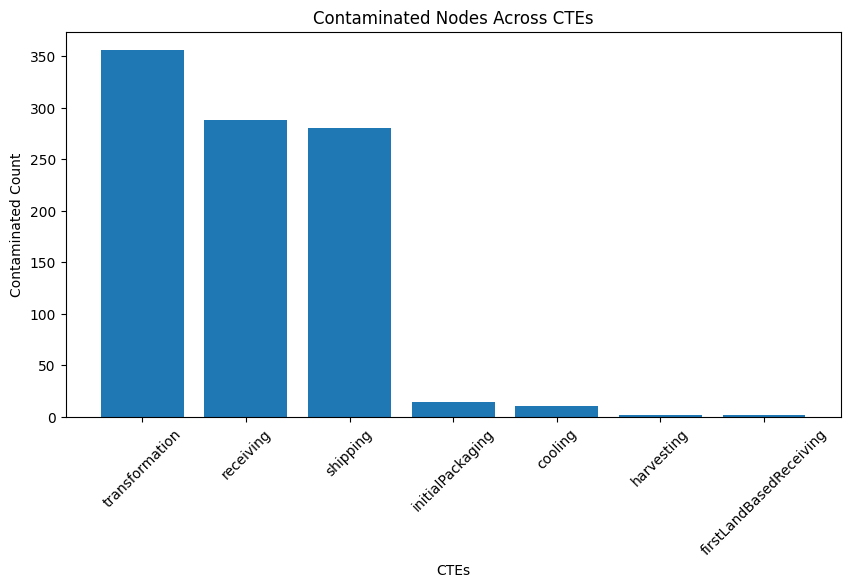

In [29]:
# Create a bar plot
plt.bar(cte_results_df['CTEs'], cte_results_df['Contaminated Count'])
plt.rcParams["figure.figsize"] = (8,6)



# Add labels and title
plt.xlabel('CTEs')
plt.ylabel('Contaminated Count')
plt.xticks(rotation= 45)
plt.title('Contaminated Nodes Across CTEs')

# Display the plot
plt.show()

In [56]:
#Visualize contaminated nodes in a supply chain with data stored in Neo4j
#contaminated_query = """MATCH(n) WHERE n.contaminated = '1' RETURN n"""

In [57]:
# Define a function to execute Cypher queries and return results
#def run_cypher_query(contaminated_query):
 #   with driver.session() as session:
  #      contaminated_result = session.run(contaminated_query)
   #     return contaminated_result.data()

In [58]:
#contaminated_nodes = run_cypher_query(contaminated_query)

In [62]:
#contaminated_nodes

[{'n': {'farmName': 'Lucky Meadows Farm',
   'commodity': 'cucumbers',
   'eventID': '0930880.94814.9364300',
   'gtin': 'urn:epc:idpat:sgtin:0930880.156917',
   'fieldName': 'Ranch K2',
   'quantity': '710',
   'sgln': 'urn:epc:id:sgln:0930880.94814',
   'unitOfMeasure': 'g',
   'cteDate': '2023-07-23',
   'pgln': 'urn:epc:id:pgln:0930880.94814',
   'dataSubmitter': 'Lucky Meadows Farm',
   'phoneNumber': '6185526855',
   'containerName': 'n/a',
   'recipient': 'Premium Packs',
   'contaminated': '1'}},
 {'n': {'commodity': 'cucumbers',
   'eventID': '1045536.29145.6541321',
   'gtin': 'urn:epc:idpat:sgtin:0930880.156917',
   'sgln': 'urn:epc:id:sgln:0930880.94814',
   'quantity': '710',
   'unitOfMeasure': 'g',
   'cteDate': '2023-07-23',
   'pgln': 'urn:epc:id:pgln:1045536.29145',
   'parentID': '0930880.94814.9364300',
   'dataSubmitter': 'Premium Packs',
   'phoneNumber': '6951551962',
   'recipient': 'Premium Packs',
   'coolerLocation': 'Premium Packs',
   'contaminated': '1',
 

In [59]:
#Visualize in python
#import networkx as nx

In [60]:
#Create a NetworkX graph
#graph = nx.DiGraph()

In [71]:
# Add contaminated nodes to the graph
#contaminated_counter = 1
#for node in contaminated_nodes:
 #   node_id = f"contaminated_{contaminated_counter}"
  #  contaminated_counter += 1
   # graph.add_node(node_id, **node, contaminated='1')
    #print(f"Node ID type: {type(node_id)}")  # Print the type of node_id for debugging purposes
    #if node_id is not None and node_id not in graph:
     #   graph.add_node(node_id, contaminated='1')
    #else:
     #   print(f"Invalid node identifier: {node_id}")
        
# Verify if the nodes were added successfully
#print("Number of nodes in the graph:", graph.number_of_nodes())
#print("Nodes in the graph:", graph.nodes())

Number of nodes in the graph: 952
Nodes in the graph: ['contaminated_1', 'contaminated_2', 'contaminated_3', 'contaminated_4', 'contaminated_5', 'contaminated_6', 'contaminated_7', 'contaminated_8', 'contaminated_9', 'contaminated_10', 'contaminated_11', 'contaminated_12', 'contaminated_13', 'contaminated_14', 'contaminated_15', 'contaminated_16', 'contaminated_17', 'contaminated_18', 'contaminated_19', 'contaminated_20', 'contaminated_21', 'contaminated_22', 'contaminated_23', 'contaminated_24', 'contaminated_25', 'contaminated_26', 'contaminated_27', 'contaminated_28', 'contaminated_29', 'contaminated_30', 'contaminated_31', 'contaminated_32', 'contaminated_33', 'contaminated_34', 'contaminated_35', 'contaminated_36', 'contaminated_37', 'contaminated_38', 'contaminated_39', 'contaminated_40', 'contaminated_41', 'contaminated_42', 'contaminated_43', 'contaminated_44', 'contaminated_45', 'contaminated_46', 'contaminated_47', 'contaminated_48', 'contaminated_49', 'contaminated_50', 'con

In [72]:
#pos = nx.spring_layout(graph)
#nx.draw(graph, pos, with_labels=True, node_color='red' if 'contaminated' in graph.nodes[node] else 'blue')
#plt.show()


TypeError: unhashable type: 'dict'

In [73]:
# Layout the graph using the spring layout algorithm
#pos = nx.spring_layout(graph)

In [74]:
# Extract the 'contaminated' attribute for each node and set the node color accordingly
#node_colors = ['red' if graph.nodes[node].get('contaminated') == '1' else 'blue' for node in graph.nodes()]

In [75]:
# Draw the graph with node labels and colors
#nx.draw(graph, pos, with_labels=True, node_color=node_colors)

TypeError: '_AxesStack' object is not callable

<Figure size 800x600 with 0 Axes>

In [76]:
#pip install --upgrade matplotlib


     ---------------------------------------- 7.5/7.5 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\pranav\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [91]:
# Set up the plot
#plt.figure(figsize=(100, 100))
# Draw the graph with node labels and colors using nx.draw_networkx()
#nx.draw_networkx(graph, pos, with_labels=True, node_color=node_colors)
# Show the plot
#plt.show()

Node: contaminated_1, Attributes: {'n': {'farmName': 'Lucky Meadows Farm', 'commodity': 'cucumbers', 'eventID': '0930880.94814.9364300', 'gtin': 'urn:epc:idpat:sgtin:0930880.156917', 'fieldName': 'Ranch K2', 'quantity': '710', 'sgln': 'urn:epc:id:sgln:0930880.94814', 'unitOfMeasure': 'g', 'cteDate': '2023-07-23', 'pgln': 'urn:epc:id:pgln:0930880.94814', 'dataSubmitter': 'Lucky Meadows Farm', 'phoneNumber': '6185526855', 'containerName': 'n/a', 'recipient': 'Premium Packs', 'contaminated': '1'}, 'contaminated': '1'}
Node: contaminated_2, Attributes: {'n': {'commodity': 'cucumbers', 'eventID': '1045536.29145.6541321', 'gtin': 'urn:epc:idpat:sgtin:0930880.156917', 'sgln': 'urn:epc:id:sgln:0930880.94814', 'quantity': '710', 'unitOfMeasure': 'g', 'cteDate': '2023-07-23', 'pgln': 'urn:epc:id:pgln:1045536.29145', 'parentID': '0930880.94814.9364300', 'dataSubmitter': 'Premium Packs', 'phoneNumber': '6951551962', 'recipient': 'Premium Packs', 'coolerLocation': 'Premium Packs', 'contaminated': '

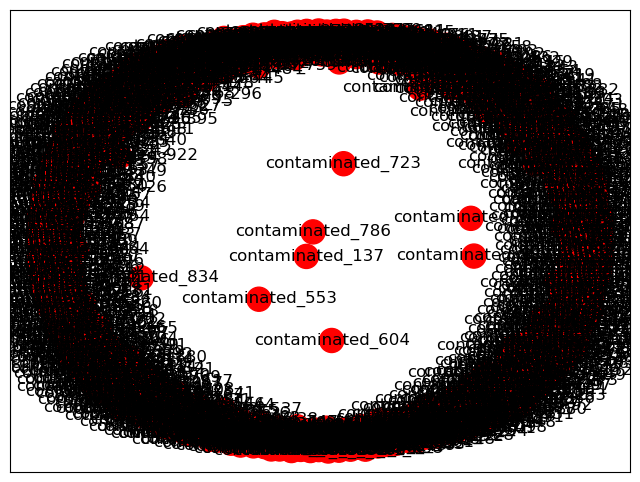

In [93]:
# Assuming you have already created the 'graph' with contaminated nodes
# Iterate through the nodes and print their attributes to identify the common attribute
#common_attribute = None
#for node in graph.nodes():
 #   attributes = graph.nodes[node]
 #   print(f"Node: {node}, Attributes: {attributes}")
  #  if common_attribute is None:
   #     common_attribute = set(attributes.keys())
    #else:
     #   common_attribute = common_attribute.intersection (set(attributes.keys()))

# The 'common_attribute' variable now contains the common attributes present in all nodes
#print("Common attribute(s) in all nodes:", common_attribute)

# Assuming you have identified the common attribute and it's called 'common_attr_name'
# Layout the graph using the spring layout algorithm
#pos = nx.spring_layout(graph)

# Extract the 'contaminated' attribute for each node and set the node color accordingly
#node_colors = ['red' if graph.nodes[node].get('contaminated') == '1' else 'blue' for node in graph.nodes()]

# Set up the plot
#plt.figure(figsize=(8, 6))

# Draw the graph with node labels and colors using nx.draw_networkx()
#nx.draw_networkx(graph, pos, with_labels=True, node_color=node_colors)

# Show the plot
#plt.show()


In [30]:
# Function to execute the Cypher query and retrieve data from Neo4j
def get_item_count_from_neo4j(uri, username, password):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            result_count = session.run("""
            MATCH (n:harvesting) WHERE (n.commodity) IS NOT NULL RETURN n.commodity AS item, 
COUNT(n.commodity) AS count
            """)
            data = [(record["item"], record["count"]) for record in result_count]
    return data

In [31]:
# Get the data from Neo4j
data = get_item_count_from_neo4j(uri, username, password)

In [32]:
# Create a DataFrame from the data
count_df = pd.DataFrame(data, columns=['Item', 'Count'])

In [33]:
# Set the size of the bubbles based on the count
bubble_sizes = count_df['Count'] * 10  # You can adjust the multiplier to control the size of bubbles

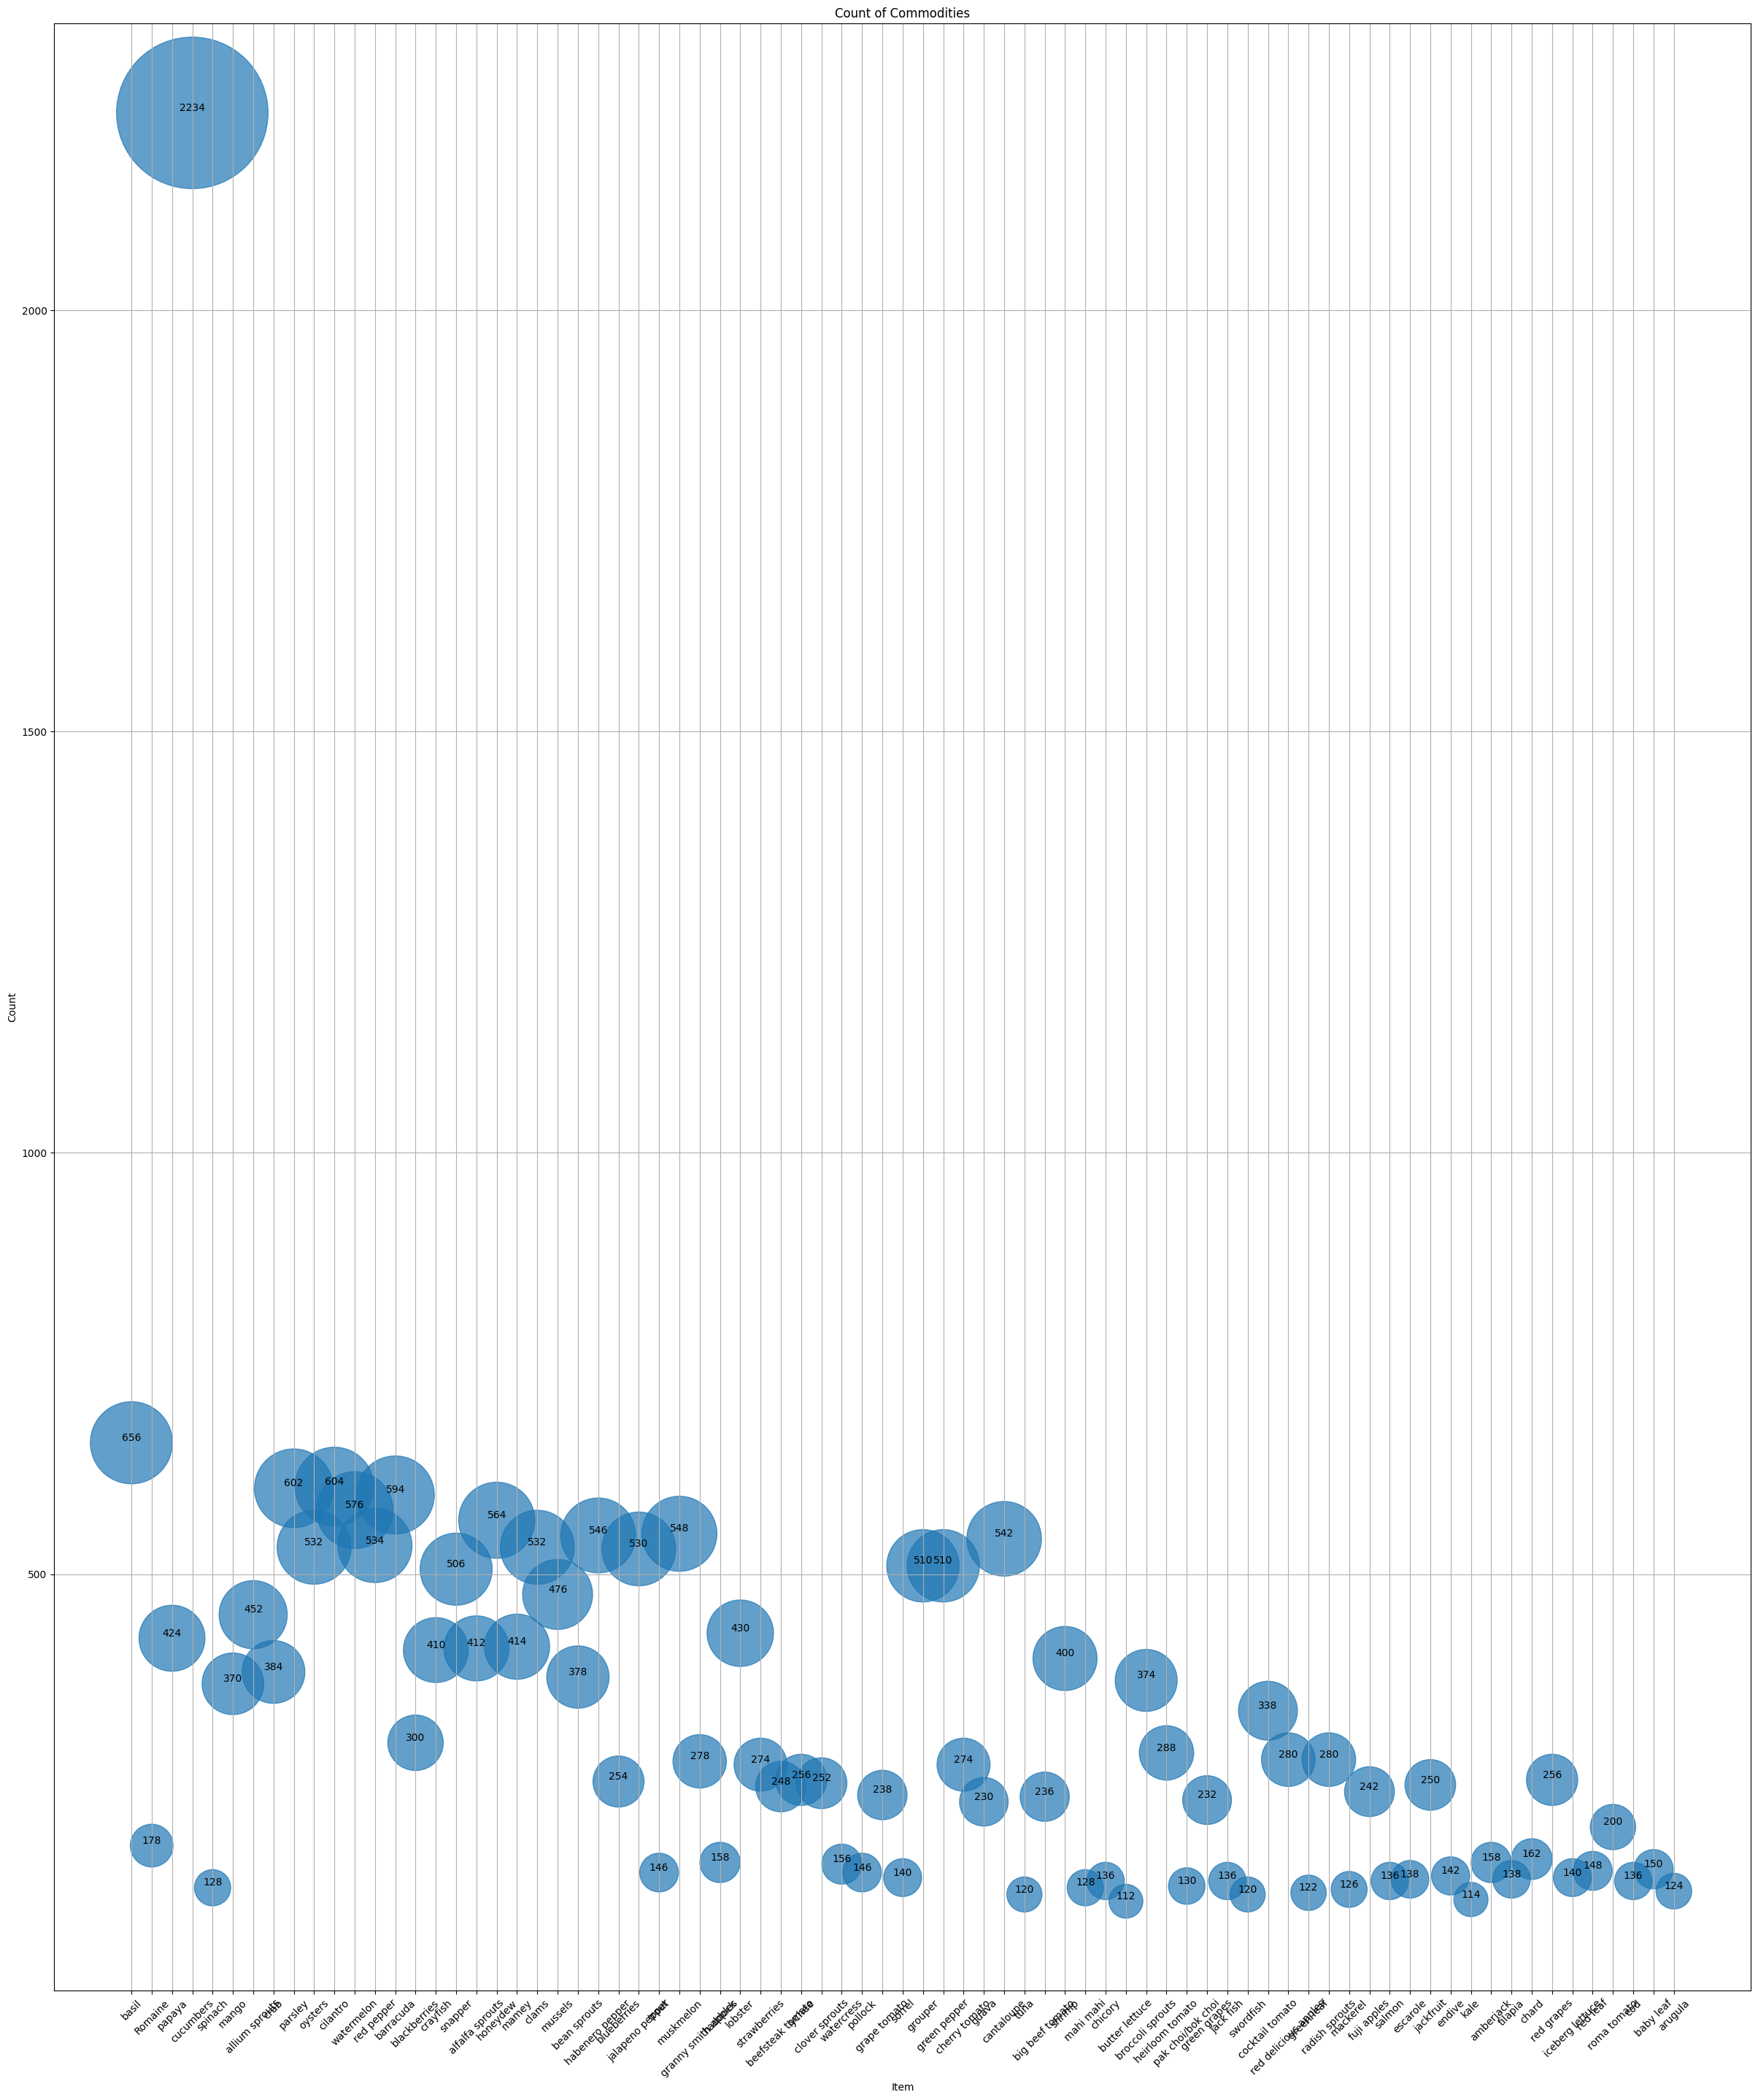

In [42]:
# Plot the bubble chart
plt.figure(figsize=(30, 35))
plt.scatter(count_df['Item'], count_df['Count'], s=bubble_sizes, alpha=0.7)
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Count of Commodities')
plt.xticks(rotation=45)
plt.grid(True)

for i, count in enumerate(count_df['Count']):
    plt.text(count_df['Item'][i], count, str(count), ha='center', va='bottom')

# Show the chart
plt.show()